In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# fetch the Dataset

spambase = fetch_ucirepo(id=94)

X = spambase.data.features
Y = spambase.data.targets
np.ravel(Y)

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
X

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [ ]:
# Train Test split

X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(Y), test_size=0.2, random_state=42)

In [ ]:
# Standardisation

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training and Evaluation

### Logistic Regression

In [ ]:
logistic_reg = LogisticRegression()

logistic_reg.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_reg.predict(X_test_scaled)

logistic_reg_accuracy = accuracy_score(y_test, y_pred_logistic)

print("Logistic Regression Accuracy:", logistic_reg_accuracy*100, "%")
print(classification_report(y_test, y_pred_logistic))

Logistic Regression Accuracy: 91.96525515743757 %
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       531
           1       0.93      0.87      0.90       390

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.92       921
weighted avg       0.92      0.92      0.92       921



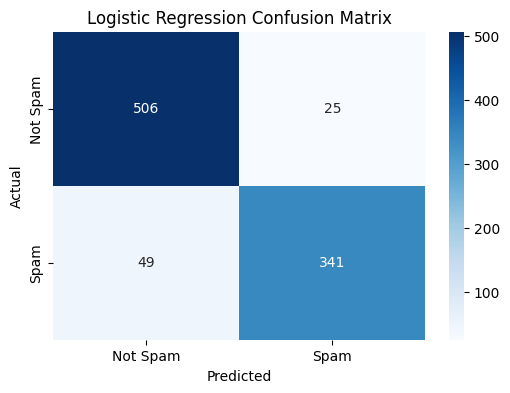

In [ ]:
logistic_reg_cm = confusion_matrix(y_test, y_pred_logistic)

#plot

plt.figure(figsize=(6, 4))
sns.heatmap(logistic_reg_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

### KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

print("K-Nearest Neighbors Accuracy:", knn_accuracy*100, "%")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Accuracy: 87.83930510314875 %
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       531
           1       0.93      0.77      0.84       390

    accuracy                           0.88       921
   macro avg       0.89      0.86      0.87       921
weighted avg       0.88      0.88      0.88       921



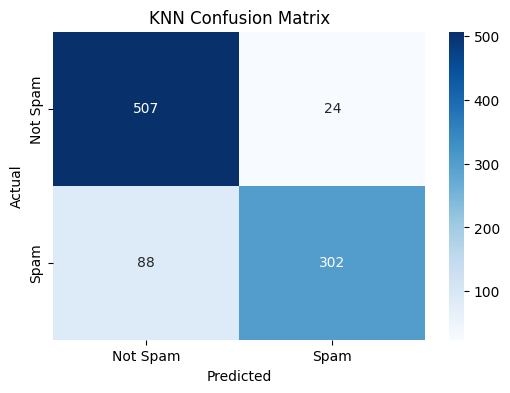

In [ ]:
knn_cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6, 4))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()

### Support Vector Machine

In [ ]:
svm = SVC()
svm.fit(X_train_scaled, y_train)

svm_pred = svm.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)

print("Support Vector Machine Accuracy:", svm_accuracy*100, "%")
print(classification_report(y_test, svm_pred))


Support Vector Machine Accuracy: 93.48534201954396 %
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       531
           1       0.95      0.89      0.92       390

    accuracy                           0.93       921
   macro avg       0.94      0.93      0.93       921
weighted avg       0.94      0.93      0.93       921



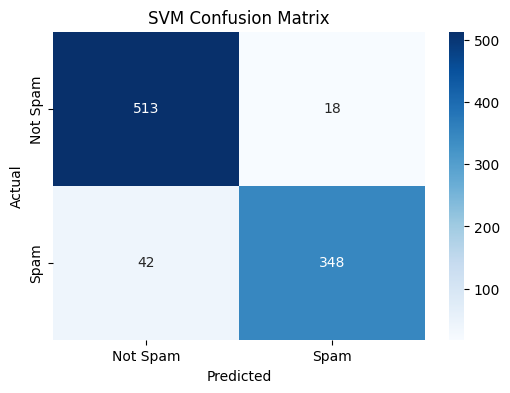

In [ ]:
svm_cm = confusion_matrix(y_test, svm_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

## Decision Tree Classifier

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

dt_pred = decision_tree.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

print("Decision Tree Accuracy:", dt_accuracy*100, "%")
print(classification_report(y_test, dt_pred))

Decision Tree Accuracy: 90.98805646036917 %
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       531
           1       0.91      0.88      0.89       390

    accuracy                           0.91       921
   macro avg       0.91      0.91      0.91       921
weighted avg       0.91      0.91      0.91       921



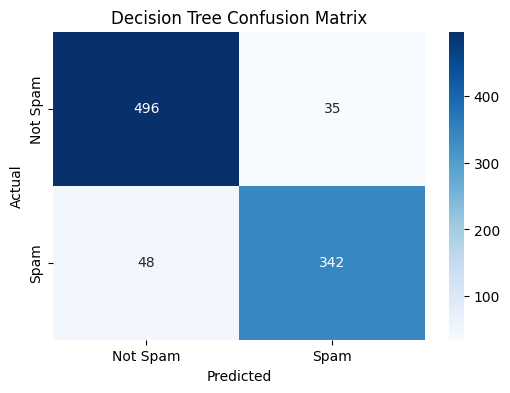

In [ ]:
decision_tree_cm = confusion_matrix(y_test, dt_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(decision_tree_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

### Random Forest

In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

rf_pred = random_forest.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

print("Random Forest Accuracy:", rf_accuracy*100, "%")
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 95.33116178067318 %
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       531
           1       0.97      0.92      0.94       390

    accuracy                           0.95       921
   macro avg       0.96      0.95      0.95       921
weighted avg       0.95      0.95      0.95       921



<Figure size 600x400 with 0 Axes>

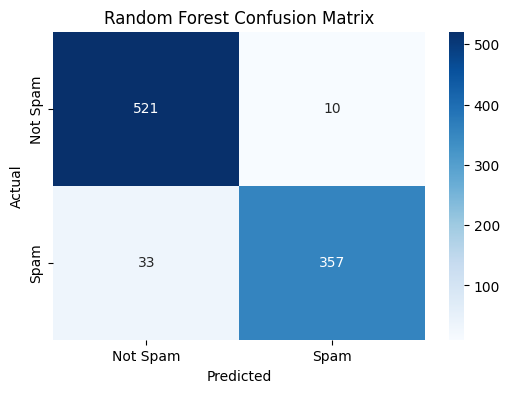

In [ ]:
random_forest_cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(6, 4))

plt.figure(figsize=(6, 4))
sns.heatmap(random_forest_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

## Comaprison of Accuracy

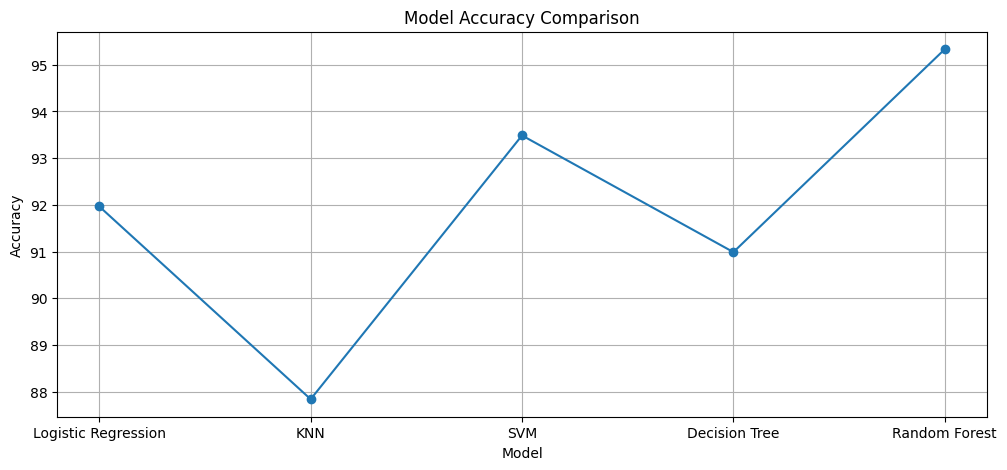

In [ ]:
Model_names = ["Logistic Regression", "KNN", "SVM", "Decision Tree", "Random Forest"]
Accuracy = [logistic_reg_accuracy*100, knn_accuracy*100, svm_accuracy*100, dt_accuracy*100, rf_accuracy*100]

plt.figure(figsize=(12, 5))
plt.plot(Model_names, Accuracy, marker='o')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.grid(True)
plt.show()

## Comparison for False Positive Rate

In [ ]:
confusion_matrices = [logistic_reg_cm, knn_cm, svm_cm, decision_tree_cm, random_forest_cm]
false_positive_rates = []

for cm in confusion_matrices:
    false_positive_rate = cm[0, 1] / (cm[0, 1] + cm[0, 0])

    false_positive_rates.append(false_positive_rate*100)

false_positive_rates

[4.708097928436912,
 4.519774011299435,
 3.389830508474576,
 6.591337099811676,
 1.8832391713747645]

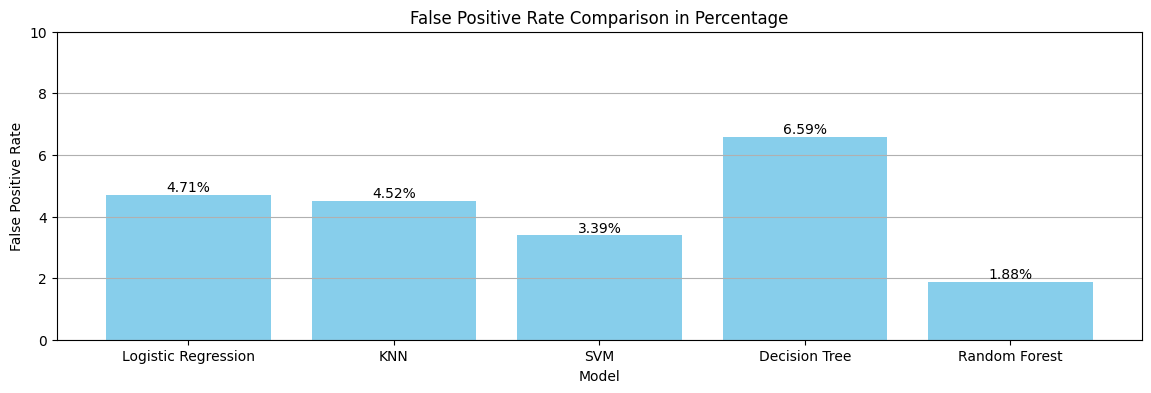

In [ ]:
# Plotting the FPR rates

plt.figure(figsize=(14, 4))
plt.bar(Model_names, false_positive_rates, color='skyblue')
plt.xlabel('Model')
plt.ylabel('False Positive Rate')
plt.title('False Positive Rate Comparison in Percentage')
plt.ylim(0, 10)
plt.grid(axis='y')

for x,y in zip(Model_names, false_positive_rates):
    plt.text(x, y, f'{y:.2f}%', ha='center', va='bottom')


plt.show()